In [118]:
# !pip install mlforecast

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from matplotlib.pylab import rcParams

from mlforecast import MLForecast
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error as MSE

In [120]:
rcParams['figure.figsize'] = 15, 6

In [121]:
path_matlab = "../../data/series/series_matlab.csv"
path_fires = "../../data/series/series_fires_acre.csv"

series_matlab = pd.read_csv(path_matlab)
series_fires = pd.read_csv(path_fires, encoding='ISO-8859-1')

# Series Matlab

In [122]:
series_matlab

,month,matlab
0,2009-01-31,19
1,2009-02-28,27
2,2009-03-31,24
3,2009-04-30,32
4,2009-05-31,42
...,...,...
127,2019-08-31,371
128,2019-09-30,362
129,2019-10-31,523
130,2019-11-30,479


In [123]:
series_matlab['month'] = pd.to_datetime(series_matlab['month'])

<Axes: xlabel='month'>

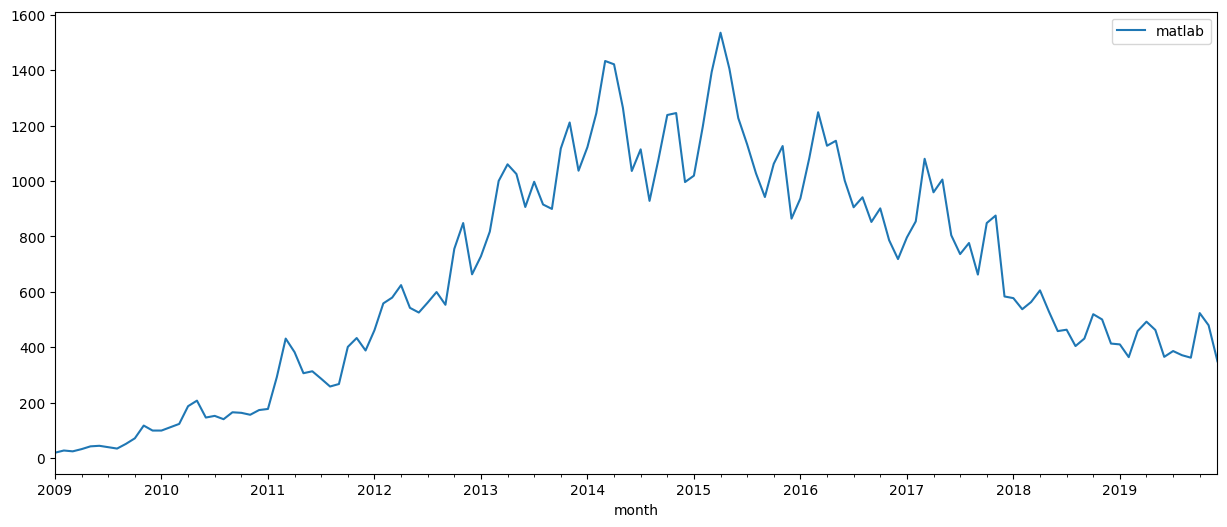

In [124]:
series_matlab_plot = series_matlab.set_index('month')
series_matlab_plot.plot()

In [125]:
train_matlab, test_matlab = series_matlab_plot.loc['2009':'2018'], series_matlab_plot.loc['2019']

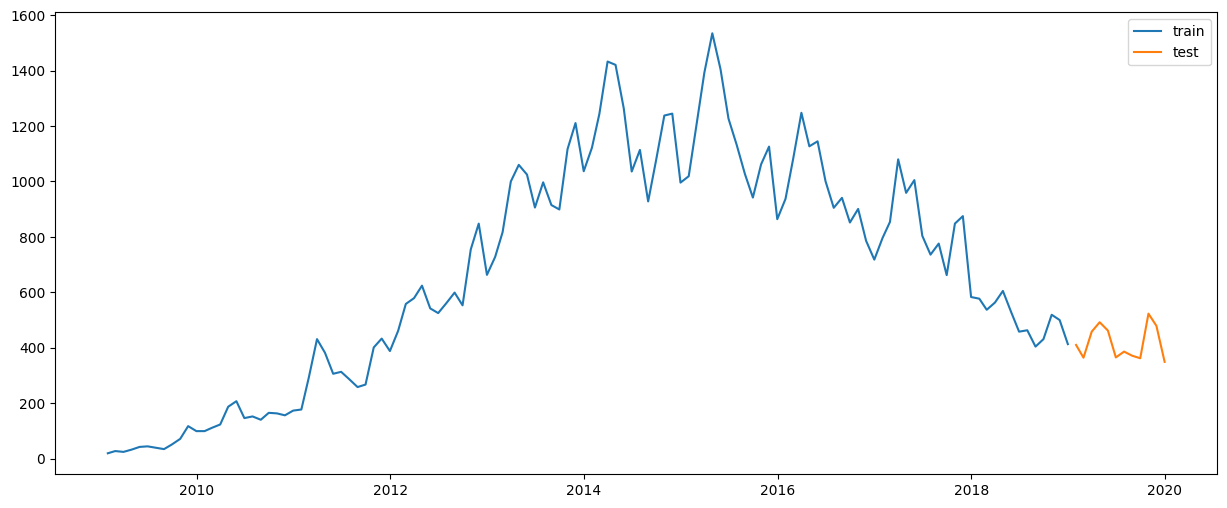

In [126]:
plt.plot(train_matlab, label = 'train')
plt.plot(test_matlab, label = 'test')
plt.legend(loc = 'best')
plt.show()

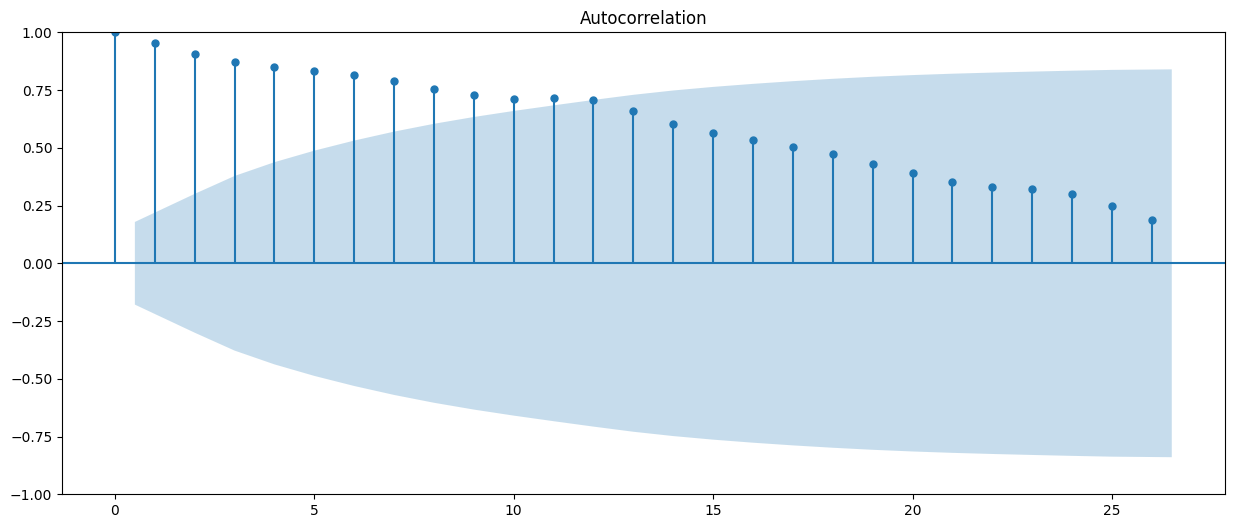

In [127]:
sm.graphics.tsa.plot_acf(train_matlab, lags=26)
plt.show()

In [128]:
series_matlab['unique_id'] = 'matlab'
series_matlab.rename(columns={'month': 'ds', 'matlab': 'y'}, inplace=True)
series_matlab

,ds,y,unique_id
0,2009-01-31,19,matlab
1,2009-02-28,27,matlab
2,2009-03-31,24,matlab
3,2009-04-30,32,matlab
4,2009-05-31,42,matlab
...,...,...,...
127,2019-08-31,371,matlab
128,2019-09-30,362,matlab
129,2019-10-31,523,matlab
130,2019-11-30,479,matlab


In [129]:
test = series_matlab.groupby('unique_id').tail(12)
train = series_matlab.drop(test.index, axis = 0)

In [130]:
train

,ds,y,unique_id
0,2009-01-31,19,matlab
1,2009-02-28,27,matlab
2,2009-03-31,24,matlab
3,2009-04-30,32,matlab
4,2009-05-31,42,matlab
...,...,...,...
115,2018-08-31,404,matlab
116,2018-09-30,431,matlab
117,2018-10-31,519,matlab
118,2018-11-30,500,matlab


In [131]:
test

,ds,y,unique_id
120,2019-01-31,410,matlab
121,2019-02-28,364,matlab
122,2019-03-31,458,matlab
123,2019-04-30,492,matlab
124,2019-05-31,462,matlab
125,2019-06-30,365,matlab
126,2019-07-31,386,matlab
127,2019-08-31,371,matlab
128,2019-09-30,362,matlab
129,2019-10-31,523,matlab


In [132]:
# models = [
#     DecisionTreeRegressor(criterion='friedman_mse', splitter='random'),
#     MLPRegressor(activation='relu', solver='lbfgs', learning_rate='adaptive'),
#     KNeighborsRegressor()
# ]

models = [
    DecisionTreeRegressor(),
    MLPRegressor(),
    KNeighborsRegressor()
]

In [133]:
fcst = MLForecast(
    models=models,
    freq='M',
    lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
)

In [134]:
fcst.fit(train, fitted=True)

MLForecast(models=[DecisionTreeRegressor, MLPRegressor, KNeighborsRegressor], freq=M, lag_features=['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11'], date_features=[], num_threads=1)

In [135]:
# predictions = fcst.predict(12, new_df=test) caso quisesse fazer previsões para 2020
predictions = fcst.predict(12)
predictions

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.

,unique_id,ds,DecisionTreeRegressor,MLPRegressor,KNeighborsRegressor
0,matlab,2019-01-31,461.0,534.119690,548.000000
1,matlab,2019-02-28,519.0,526.344910,548.000000
2,matlab,2019-03-31,461.0,544.174377,548.000000
3,matlab,2019-04-30,461.0,551.677368,564.000000
4,matlab,2019-05-31,461.0,532.522827,651.000000
5,matlab,2019-06-30,558.0,548.926880,663.200012
6,matlab,2019-07-31,579.0,543.267761,683.599976
7,matlab,2019-08-31,542.0,575.851135,709.400024
8,matlab,2019-09-30,755.0,565.287170,727.200012
9,matlab,2019-10-31,1000.0,566.576660,811.200012


In [136]:
forecast = fcst.forecast_fitted_values()
forecast

,unique_id,ds,y,DecisionTreeRegressor,MLPRegressor,KNeighborsRegressor
0,matlab,2009-12-31,99.0,99.0,59.833378,123.800003
1,matlab,2010-01-31,99.0,99.0,73.173248,123.800003
2,matlab,2010-02-28,111.0,111.0,75.466446,123.800003
3,matlab,2010-03-31,123.0,123.0,76.924225,123.800003
4,matlab,2010-04-30,187.0,187.0,98.229118,145.399994
...,...,...,...,...,...,...
104,matlab,2018-08-31,404.0,404.0,645.400696,463.399994
105,matlab,2018-09-30,431.0,431.0,613.914124,463.399994
106,matlab,2018-10-31,519.0,519.0,526.377686,453.399994
107,matlab,2018-11-30,500.0,500.0,514.347900,548.000000


### All Predictions

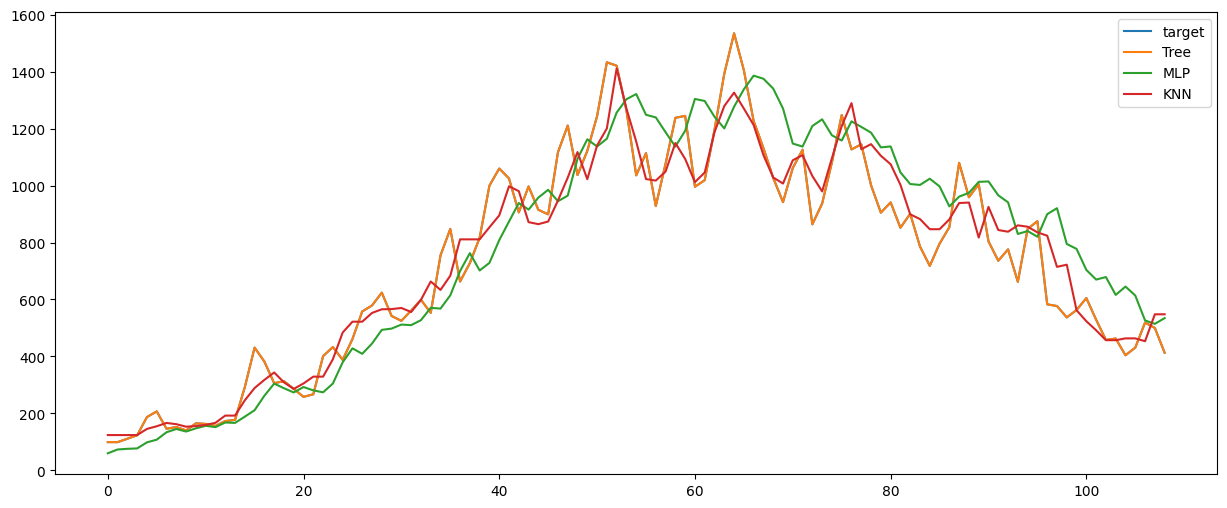

In [137]:
plt.plot(forecast['y'], label = 'target')
plt.plot(forecast['DecisionTreeRegressor'], label = 'Tree')
plt.plot(forecast['MLPRegressor'], label = 'MLP')
plt.plot(forecast['KNeighborsRegressor'], label = 'KNN')
plt.legend(loc = 'best')
plt.show()

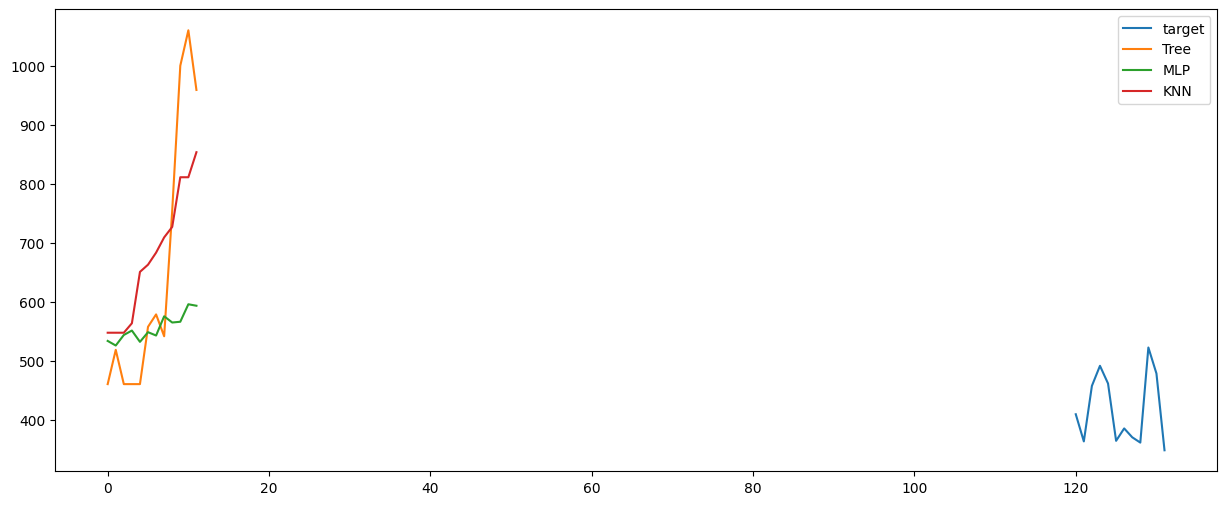

In [138]:
plt.plot(test['y'], label = 'target')
plt.plot(predictions['DecisionTreeRegressor'], label = 'Tree')
plt.plot(predictions['MLPRegressor'], label = 'MLP')
plt.plot(predictions['KNeighborsRegressor'], label = 'KNN')
plt.legend(loc = 'best')
plt.show()

### MLP x Target

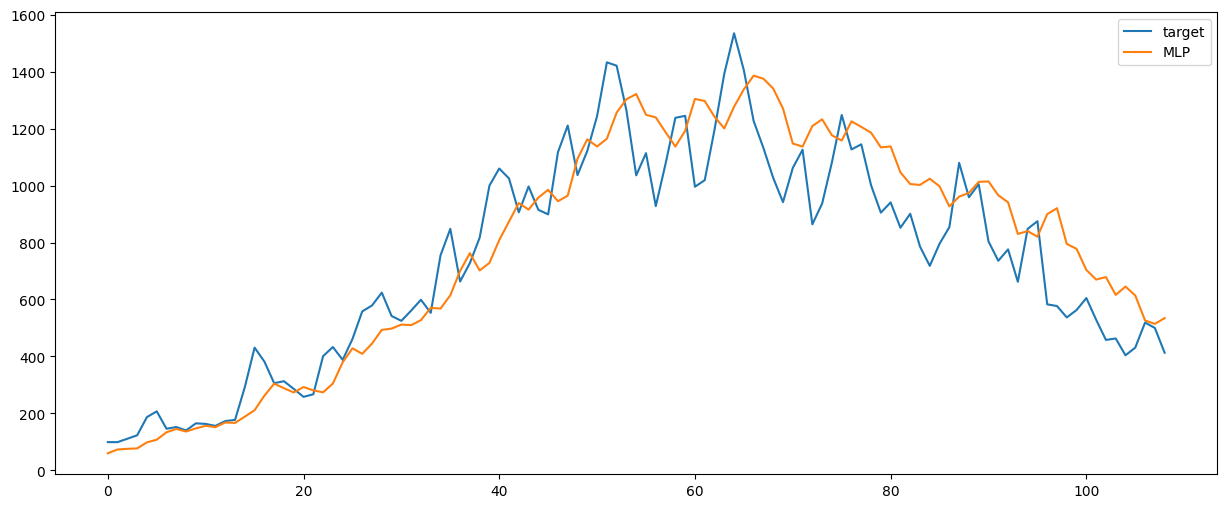

In [139]:
plt.plot(forecast['y'], label = 'target')
plt.plot(forecast['MLPRegressor'], label = 'MLP')
plt.legend(loc = 'best')
plt.show()

In [140]:
MSE(forecast['y'], forecast['MLPRegressor'])

25689.252

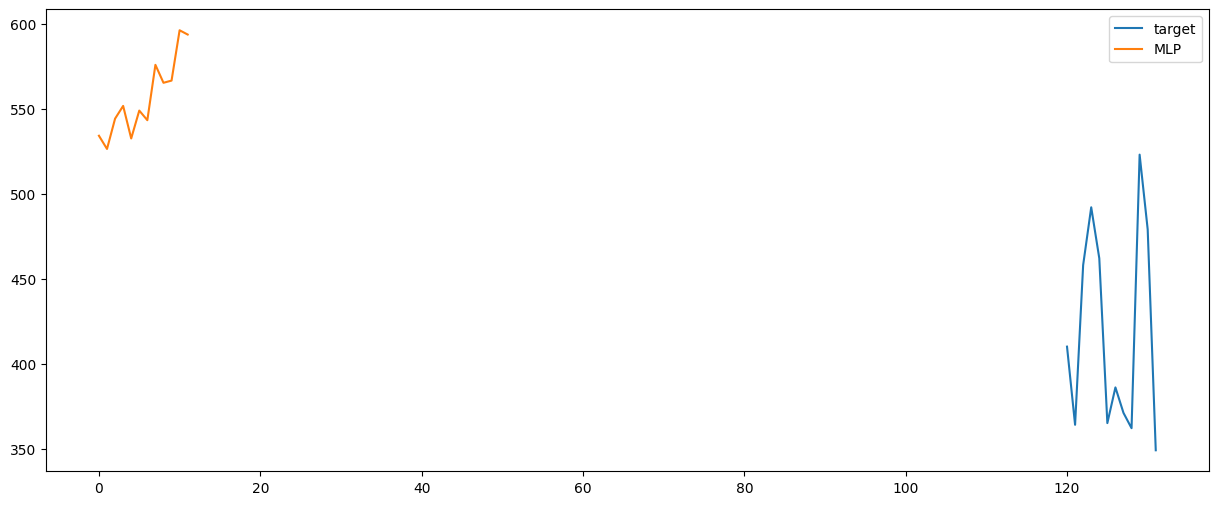

In [141]:
plt.plot(test['y'], label = 'target')
plt.plot(predictions['MLPRegressor'], label = 'MLP')
plt.legend(loc = 'best')
plt.show()

In [142]:
MSE(test['y'], predictions['MLPRegressor'])

22923.05799443492

### KNN x Target

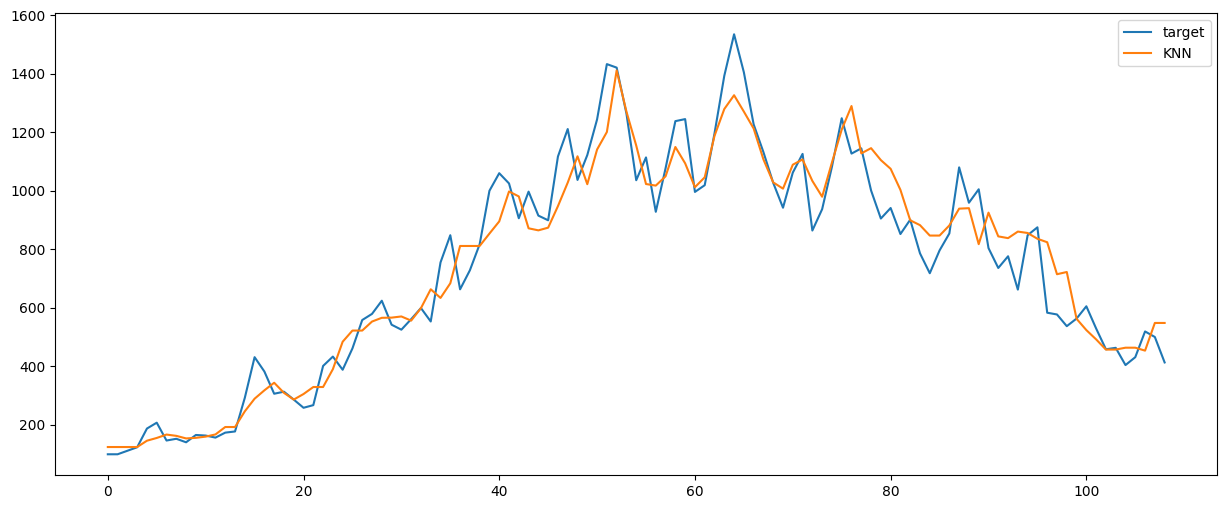

In [143]:
plt.plot(forecast['y'], label = 'target')
plt.plot(forecast['KNeighborsRegressor'], label = 'KNN')
plt.legend(loc = 'best')
plt.show()

In [144]:
MSE(forecast['y'], forecast['KNeighborsRegressor'])

8972.569

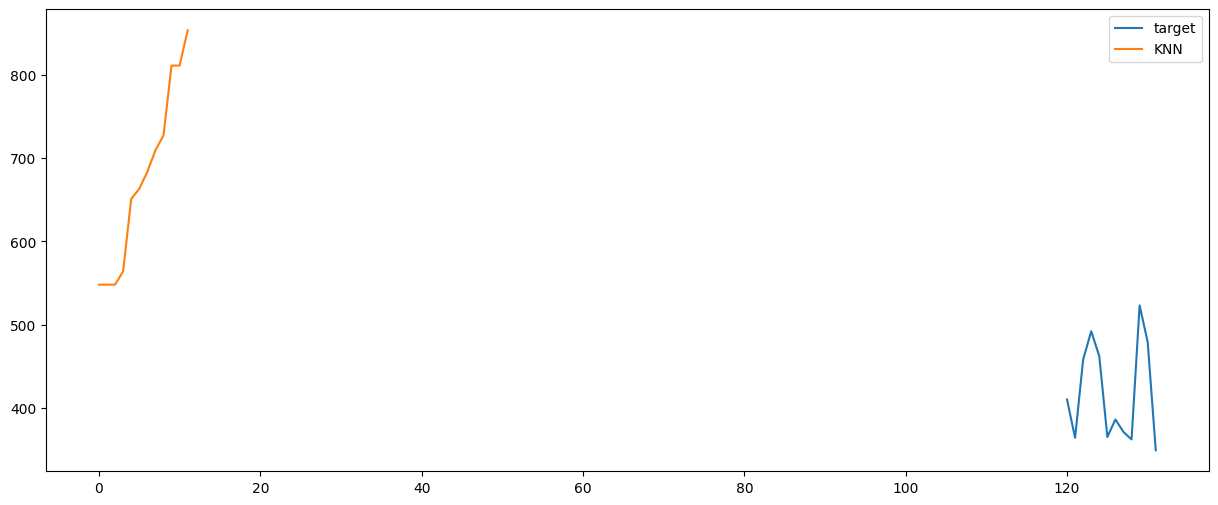

In [145]:
plt.plot(test['y'], label = 'target')
plt.plot(predictions['KNeighborsRegressor'], label = 'KNN')
plt.legend(loc = 'best')
plt.show()

In [146]:
MSE(test['y'], predictions['KNeighborsRegressor'])

81276.40405802429

### Tree x Target

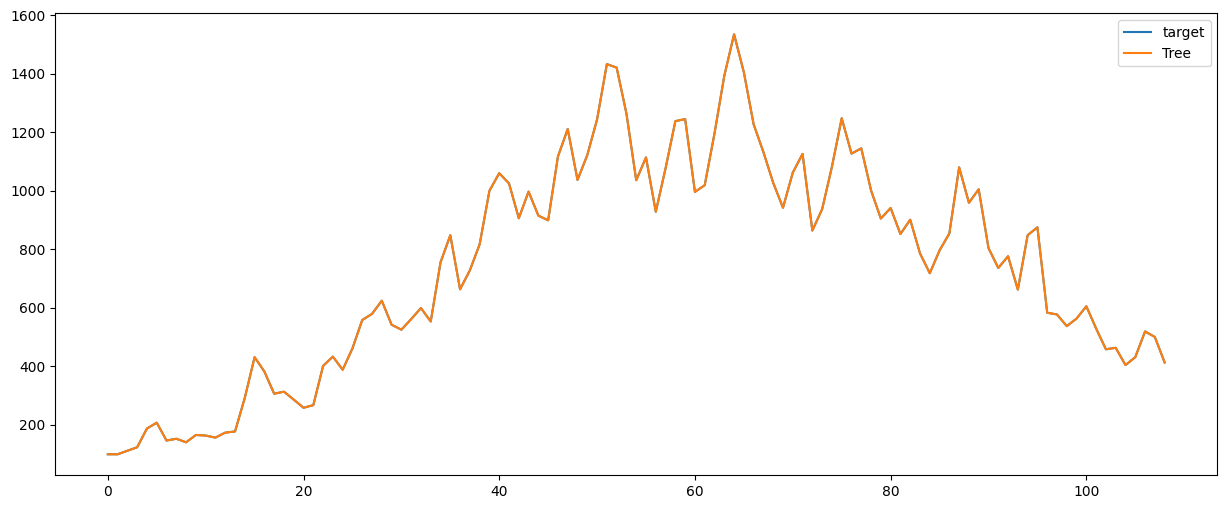

In [147]:
plt.plot(forecast['y'], label = 'target')
plt.plot(forecast['DecisionTreeRegressor'], label = 'Tree')
plt.legend(loc = 'best')
plt.show()

In [148]:
MSE(forecast['y'], forecast['DecisionTreeRegressor'])

0.0

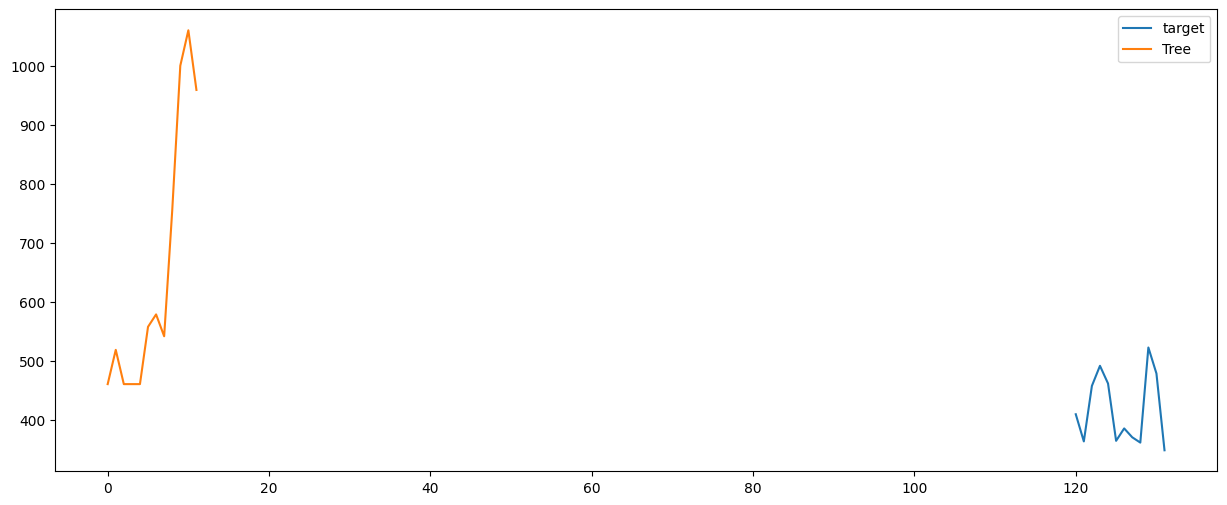

In [149]:
plt.plot(test['y'], label = 'target')
plt.plot(predictions['DecisionTreeRegressor'], label = 'Tree')
plt.legend(loc = 'best')
plt.show()

In [150]:
MSE(test['y'], predictions['DecisionTreeRegressor'])

101914.58333333333

# Series Fires

In [151]:
series_fires

,date,number
0,1998-01-01,0.000
1,1998-02-01,0.000
2,1998-03-01,0.000
3,1998-04-01,0.000
4,1998-05-01,0.000
...,...,...
234,2017-07-01,457.000
235,2017-08-01,1.493
236,2017-09-01,3.429
237,2017-10-01,1.508


In [152]:
series_fires['date'] = pd.to_datetime(series_fires['date'])

In [153]:
series_fires['unique_id'] = 'ACRE'
series_fires.rename(columns={'date': 'ds', 'number': 'y'}, inplace=True)
series_fires

,ds,y,unique_id
0,1998-01-01,0.000,ACRE
1,1998-02-01,0.000,ACRE
2,1998-03-01,0.000,ACRE
3,1998-04-01,0.000,ACRE
4,1998-05-01,0.000,ACRE
...,...,...,...
234,2017-07-01,457.000,ACRE
235,2017-08-01,1.493,ACRE
236,2017-09-01,3.429,ACRE
237,2017-10-01,1.508,ACRE


In [154]:
test = series_fires.groupby('unique_id').tail(12)
train = series_fires.drop(test.index, axis = 0)

In [155]:
train

,ds,y,unique_id
0,1998-01-01,0.000,ACRE
1,1998-02-01,0.000,ACRE
2,1998-03-01,0.000,ACRE
3,1998-04-01,0.000,ACRE
4,1998-05-01,0.000,ACRE
...,...,...,...
222,2016-07-01,533.000,ACRE
223,2016-08-01,2.188,ACRE
224,2016-09-01,3.586,ACRE
225,2016-10-01,509.000,ACRE


In [156]:
test

,ds,y,unique_id
227,2016-12-01,6.000,ACRE
228,2017-01-01,0.000,ACRE
229,2017-02-01,1.000,ACRE
230,2017-03-01,0.000,ACRE
231,2017-04-01,1.000,ACRE
232,2017-05-01,10.000,ACRE
233,2017-06-01,45.000,ACRE
234,2017-07-01,457.000,ACRE
235,2017-08-01,1.493,ACRE
236,2017-09-01,3.429,ACRE


In [157]:
models = [
    DecisionTreeRegressor(),
    MLPRegressor(),
    KNeighborsRegressor()
]

In [158]:
fcst = MLForecast(
    models=models,
    freq='M',
    lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
)

In [159]:
fcst.fit(train, fitted=True)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLForecast(models=[DecisionTreeRegressor, MLPRegressor, KNeighborsRegressor], freq=M, lag_features=['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12'], date_features=[], num_threads=1)

In [160]:
predictions = fcst.predict(12)
predictions

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.

,unique_id,ds,DecisionTreeRegressor,MLPRegressor,KNeighborsRegressor
0,ACRE,2016-11-30,2.0,-75.172821,1.8000
1,ACRE,2016-12-31,1.0,14.901921,1.0000
2,ACRE,2017-01-31,2.0,-8.493335,1.2000
3,ACRE,2017-02-28,1.0,24.972844,0.6000
4,ACRE,2017-03-31,1.0,1.211905,2.0000
5,ACRE,2017-04-30,839.0,48.113906,5.4000
6,ACRE,2017-05-31,60.0,19.781361,25.4000
7,ACRE,2017-06-30,93.0,295.983850,203.2000
8,ACRE,2017-07-31,8.0,135.662843,253.6158
9,ACRE,2017-08-31,5.0,-0.673001,2.4362


In [161]:
forecast = fcst.forecast_fitted_values()
forecast

,unique_id,ds,y,DecisionTreeRegressor,MLPRegressor,KNeighborsRegressor
0,ACRE,1999-01-01,0.000,0.000,4.715688,1.2000
1,ACRE,1999-02-01,0.000,0.000,9.854261,0.4000
2,ACRE,1999-03-01,0.000,0.000,5.500015,1.2000
3,ACRE,1999-04-01,0.000,0.000,8.962703,2.4000
4,ACRE,1999-05-01,0.000,0.000,24.669185,8.4000
...,...,...,...,...,...,...
210,ACRE,2016-07-01,533.000,533.000,230.587520,115.4000
211,ACRE,2016-08-01,2.188,2.188,117.303039,297.5740
212,ACRE,2016-09-01,3.586,3.586,23.132280,11.0624
213,ACRE,2016-10-01,509.000,509.000,820.571006,506.6000


### All Predictions

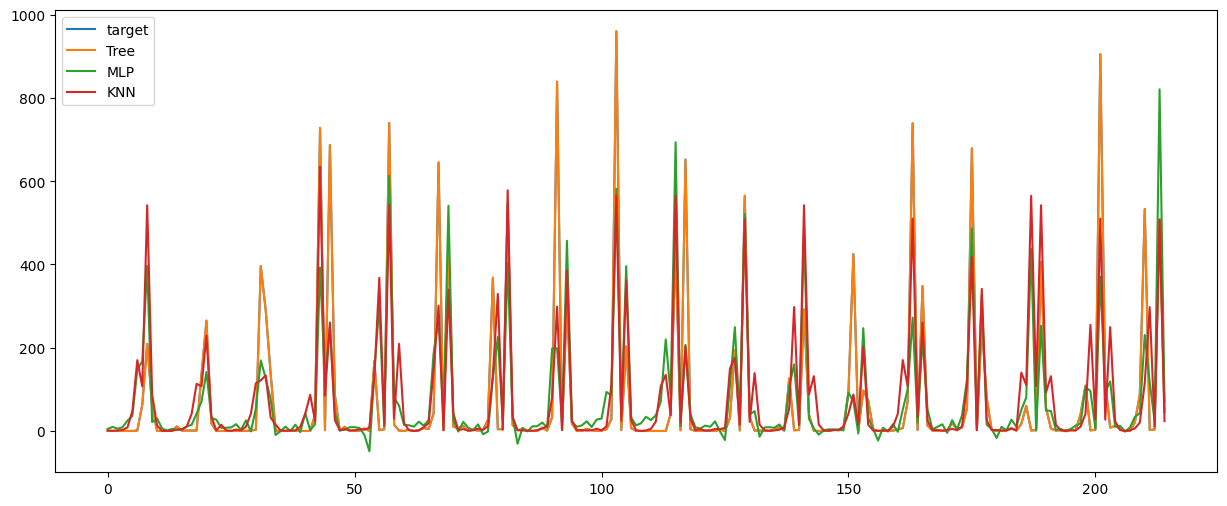

In [162]:
plt.plot(forecast['y'], label = 'target')
plt.plot(forecast['DecisionTreeRegressor'], label = 'Tree')
plt.plot(forecast['MLPRegressor'], label = 'MLP')
plt.plot(forecast['KNeighborsRegressor'], label = 'KNN')
plt.legend(loc = 'best')
plt.show()

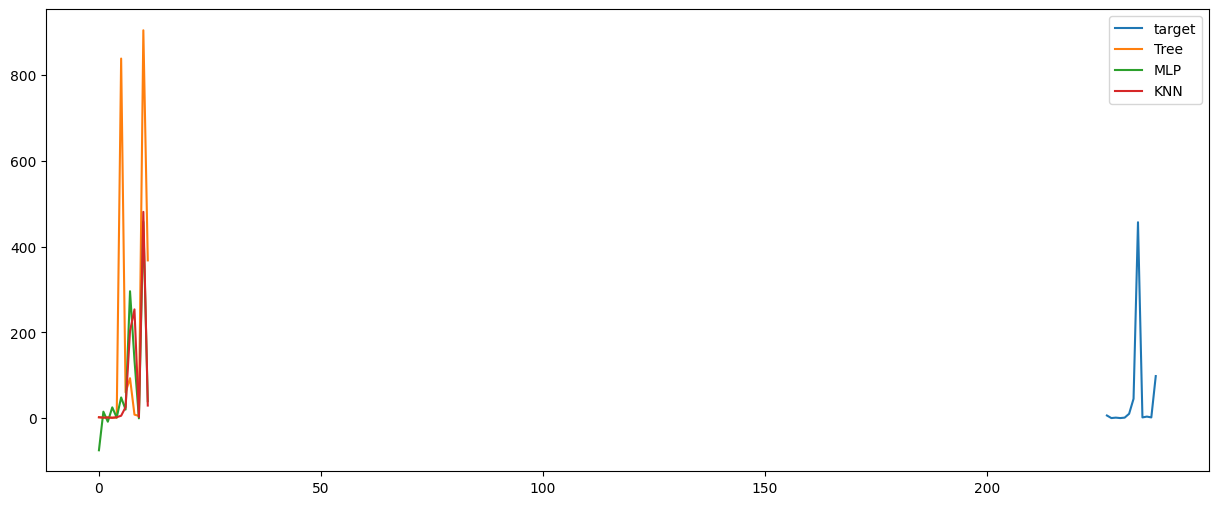

In [163]:
plt.plot(test['y'], label = 'target')
plt.plot(predictions['DecisionTreeRegressor'], label = 'Tree')
plt.plot(predictions['MLPRegressor'], label = 'MLP')
plt.plot(predictions['KNeighborsRegressor'], label = 'KNN')
plt.legend(loc = 'best')
plt.show()

### MLP x Target

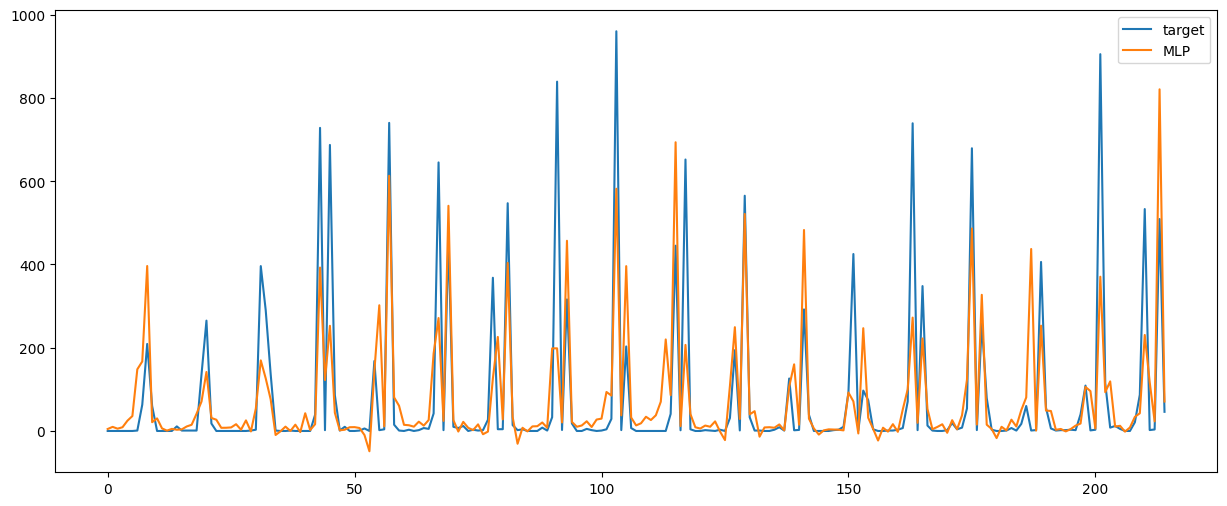

In [164]:
plt.plot(forecast['y'], label = 'target')
plt.plot(forecast['MLPRegressor'], label = 'MLP')
plt.legend(loc = 'best')
plt.show()

In [165]:
MSE(forecast['y'], forecast['MLPRegressor'])

14614.622123689014

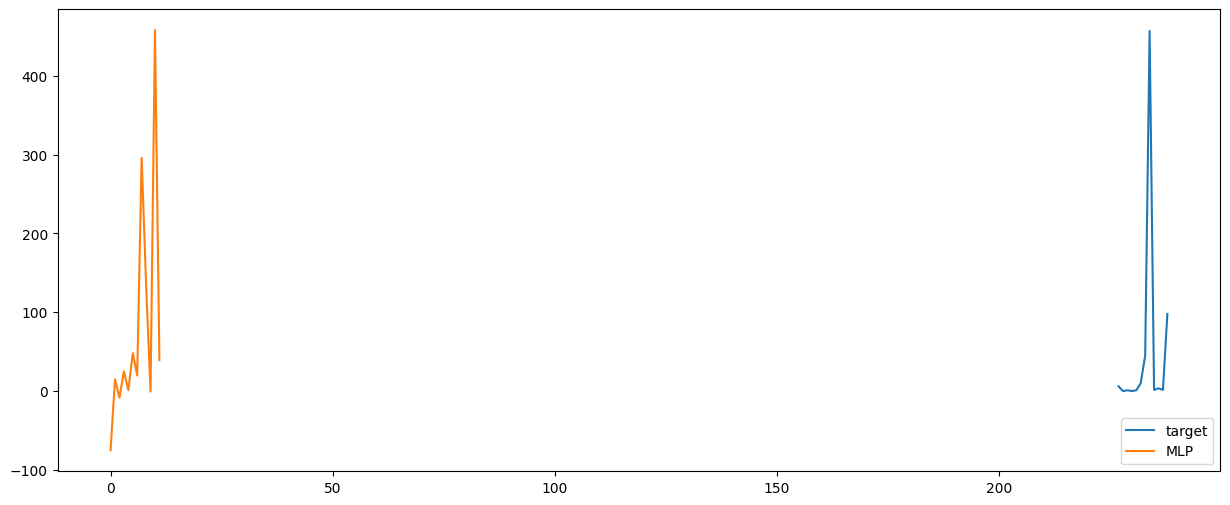

In [166]:
plt.plot(test['y'], label = 'target')
plt.plot(predictions['MLPRegressor'], label = 'MLP')
plt.legend(loc = 'best')
plt.show()

In [167]:
MSE(test['y'], predictions['MLPRegressor'])

22111.237862427563

### KNN x Target

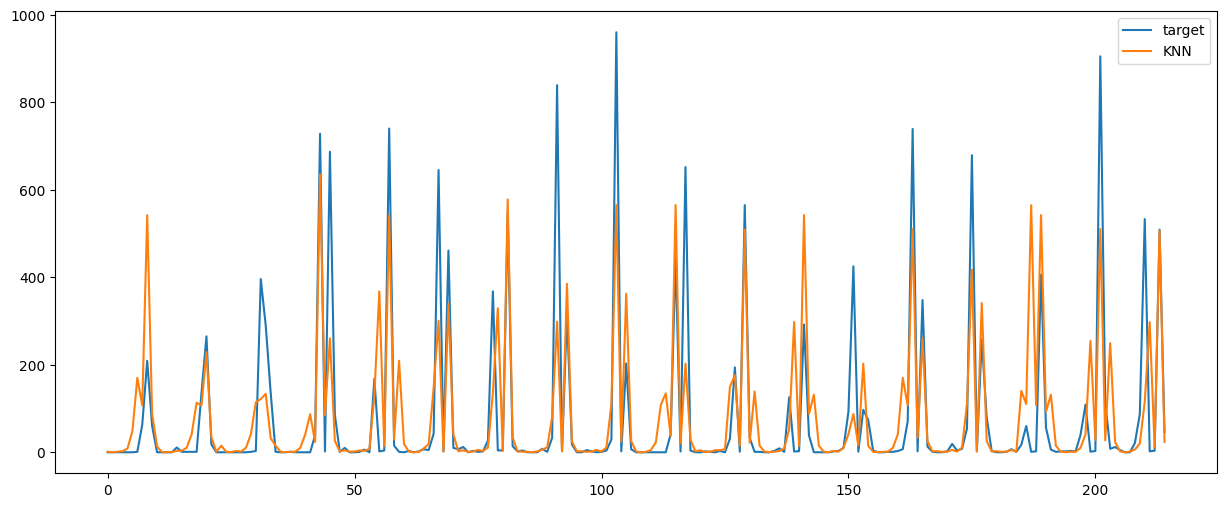

In [168]:
plt.plot(forecast['y'], label = 'target')
plt.plot(forecast['KNeighborsRegressor'], label = 'KNN')
plt.legend(loc = 'best')
plt.show()

In [169]:
MSE(forecast['y'], forecast['KNeighborsRegressor'])

14960.759781876093

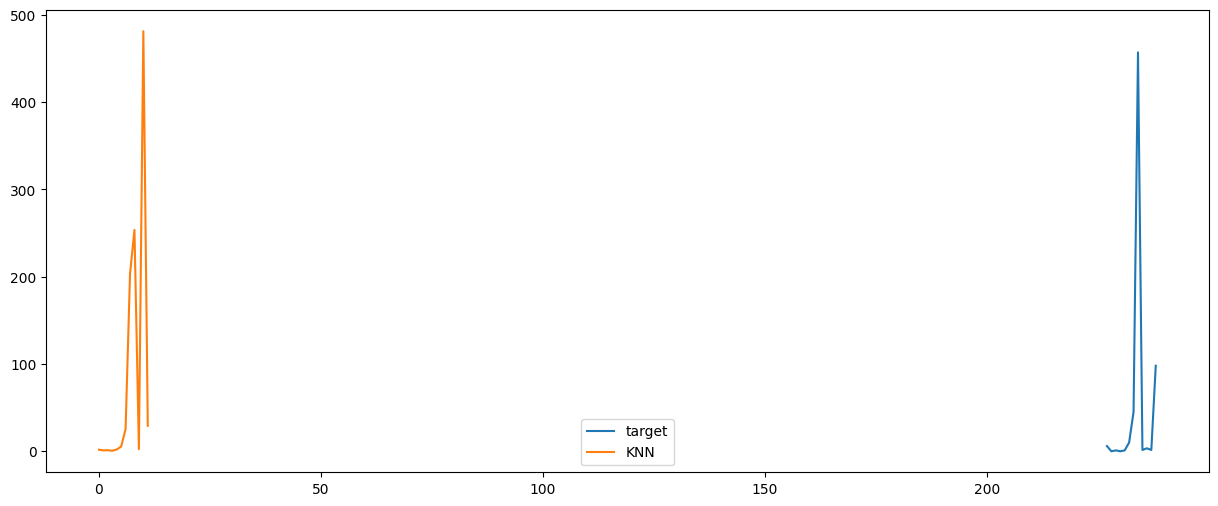

In [170]:
plt.plot(test['y'], label = 'target')
plt.plot(predictions['KNeighborsRegressor'], label = 'KNN')
plt.legend(loc = 'best')
plt.show()

In [171]:
MSE(test['y'], predictions['KNeighborsRegressor'])

30270.378899640007

### Tree x Target

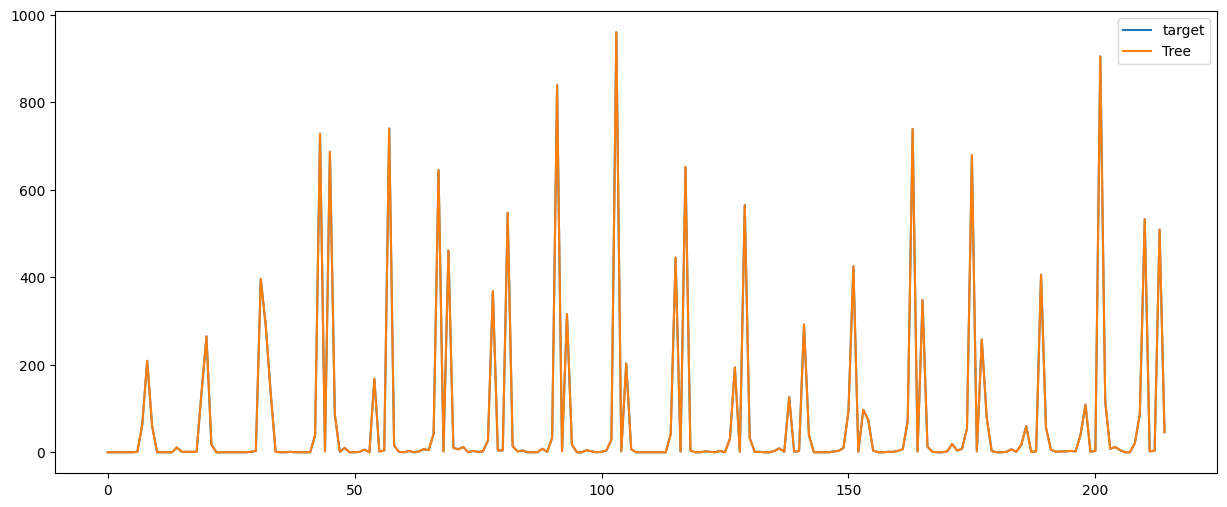

In [172]:
plt.plot(forecast['y'], label = 'target')
plt.plot(forecast['DecisionTreeRegressor'], label = 'Tree')
plt.legend(loc = 'best')
plt.show()

In [173]:
MSE(forecast['y'], forecast['DecisionTreeRegressor'])

0.0

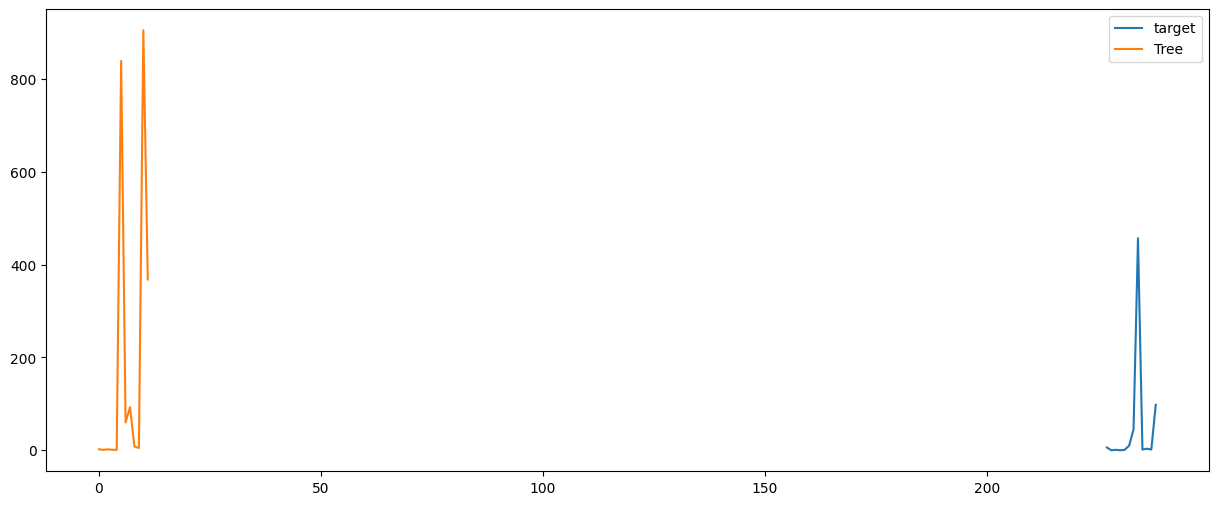

In [174]:
plt.plot(test['y'], label = 'target')
plt.plot(predictions['DecisionTreeRegressor'], label = 'Tree')
plt.legend(loc = 'best')
plt.show()

In [175]:
MSE(test['y'], predictions['DecisionTreeRegressor'])

142435.30026283333